UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 328: invalid start byte

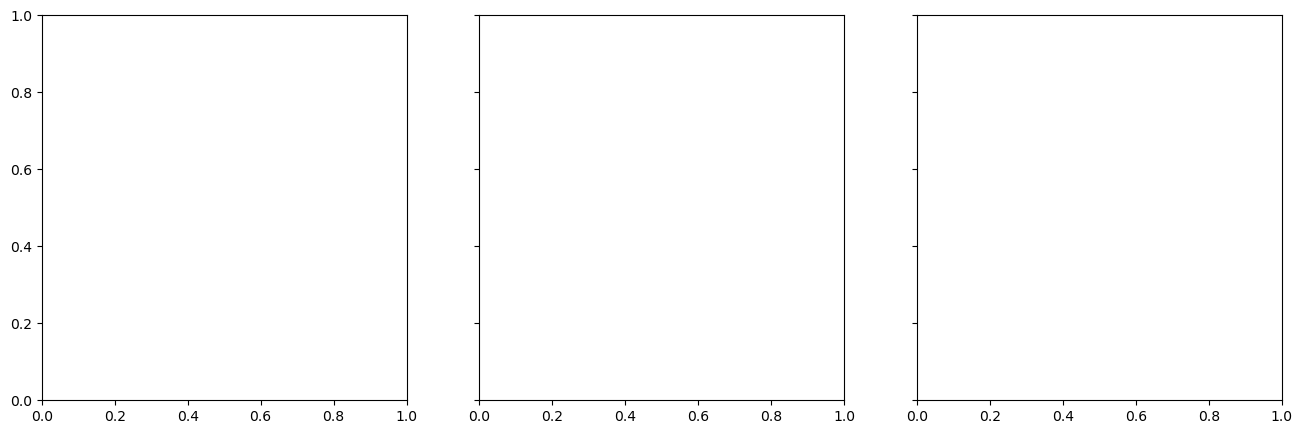

In [49]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# replace with your absolute file path here
log_csvs = sorted(os.listdir('/Users/quanhongjin/Documents/Cornell Tech/CS5785/Porject/logs'))

labels = ['Conv 1D', 'Conv 2D', 'LSTM']
colors = ['r', 'm', 'c']

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,5))

for i, (fn, label, c) in enumerate(zip(log_csvs, labels, colors)):
    csv_path = os.path.join('/Users/quanhongjin/Documents/Cornell Tech/CS5785/Porject', 'logs', fn)
    df = pd.read_csv(csv_path)
    ax[i].set_title(label, size=16)
    ax[i].plot(df.accuracy, color=c, label='Training')
    ax[i].plot(df.val_accuracy, ls='--', color=c, label='Validation')
    ax[i].legend(loc='lower right')
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].set_ylim([0.6,1.0])

fig.text(0.5, 0.02, 'Epochs', ha='center', size=14)
fig.text(0.08, 0.5, 'Accuracy', va='center', rotation='vertical', size=14)
plt.show()

In [48]:
# File paths for your CSV files
files = {
    'Conv1D': '/Users/quanhongjin/Documents/Cornell Tech/CS5785/Porject/logs/conv1D_history.csv',
    'Conv2D': '/Users/quanhongjin/Documents/Cornell Tech/CS5785/Porject/logs/conv2D_history.csv',
    'LSTM': '/Users/quanhongjin/Documents/Cornell Tech/CS5785/Porject/logs/lstm_history.csv'
}

# Initialize an empty DataFrame for the summary
summary = pd.DataFrame(columns=['Model', 'Best Val Accuracy', 'Corresponding Val Loss', 'Mean Val Accuracy','Median Val Accuracy','Epoch', 'Best Epoch at'])

# Process each file
for model_name, file_path in files.items():
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Find the best validation accuracy and corresponding loss and epoch
    best_val_acc = df['val_accuracy'].max()
    mean_val_acc = df['val_accuracy'].mean()
    median_val_acc = df['val_accuracy'].median()
    best_row = df[df['val_accuracy'] == best_val_acc].iloc[0]
    best_val_loss = best_row['val_loss']
    best_epoch = best_row['epoch']

    # Append to the summary DataFrame
    temp_df = pd.DataFrame([{
        'Model': model_name,
        'Best Val Accuracy': best_val_acc,
        'Mean Val Accuracy':mean_val_acc,
        'Median Val Accuracy': median_val_acc,
        'Corresponding Val Loss': best_val_loss,
        'Best Epoch at': best_epoch,
        'Epoch':30,      

    }])
    summary = pd.concat([summary, temp_df], ignore_index=True)
# Transpose the summary DataFrame
transposed_summary = summary.transpose()

# Define your data for F1 and Precision, filling in the rest of the values
f1_data = [0.982310, 0.997381, 0.987211] + [None] * (len(transposed_summary.columns) - 3)
precision_data = [0.991231, 0.997214, 0.973137] + [None] * (len(transposed_summary.columns) - 3)

# Insert new data for F1 and Precision
transposed_summary.loc['F1 Score'] = f1_data
transposed_summary.loc['Precision'] = precision_data

# Apply styling to the transposed DataFrame
styled_transposed_summary = transposed_summary.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '3px solid black')]},
     {'selector': 'td', 'props': [('border', '3px solid black')]}]
)

# Display the styled DataFrame in a Jupyter Notebook
styled_transposed_summary


,0,1,2
Model,Conv1D,Conv2D,LSTM
Best Val Accuracy,0.997368,0.998026,0.997368
Corresponding Val Loss,0.014115,0.019373,0.016146
Mean Val Accuracy,0.986721,0.986469,0.977851
Median Val Accuracy,0.991447,0.990625,0.986020
Epoch,30,30,30
Best Epoch at,25.000000,13.000000,28.000000
F1 Score,0.982310,0.997381,0.987211
Precision,0.991231,0.997214,0.973137


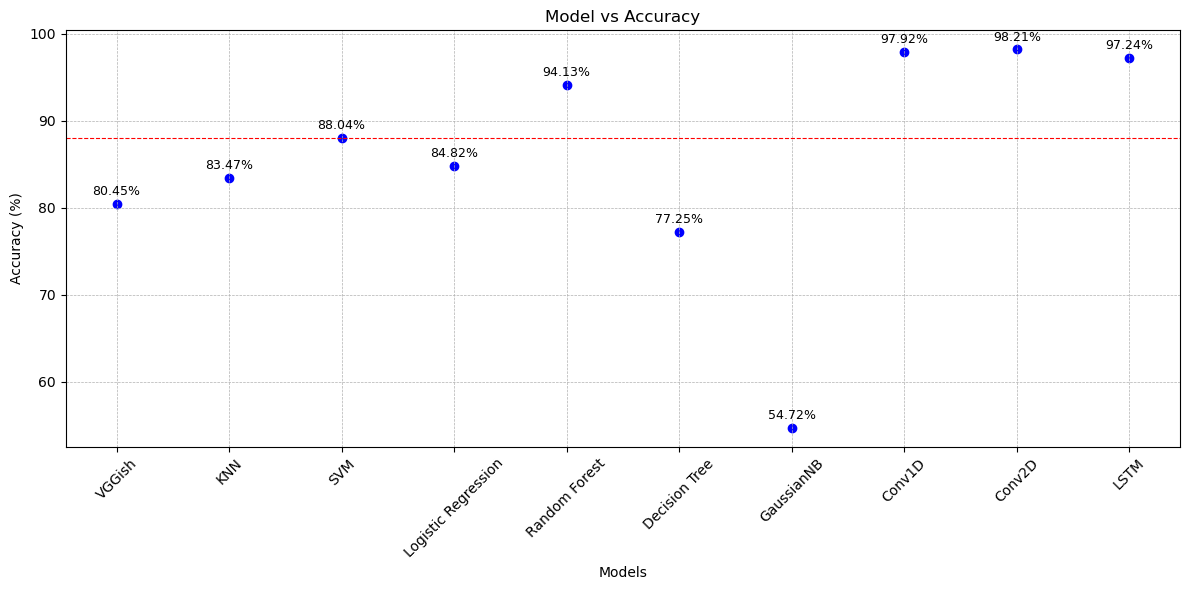

In [43]:
# Given models and their accuracies
models = ["VGGish", "KNN", "SVM", "Logistic Regression", "Random Forest", "Decision Tree", "GaussianNB", "Conv1D", "Conv2D", "LSTM"]
accuracy = [80.4460, 83.47, 88.04, 84.82, 94.13, 77.25, 54.72, 98.67, 98.65, 97.79]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(models, accuracy, color='blue')

# Draw a horizontal line for reference (e.g., at the accuracy level of SVM)
svm_accuracy = accuracy[2]  # Assuming SVM is at index 2
plt.axhline(y=svm_accuracy, color='red', linestyle='--', linewidth=0.8)

# Annotate each point with its accuracy percentage
for i, txt in enumerate(accuracy):
    plt.annotate(f"{txt:.2f}%", (models[i], accuracy[i] + 1), ha='center', fontsize=9)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model vs Accuracy')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(models, rotation=45)  # Set x-ticks to be the model names
plt.tight_layout()
plt.show()
